In [5]:
import numpy as np 
import matplotlib.pyplot as plt 

import sys
import os

main_dir=os.path.dirname(sys.path[0])

from PIL import Image

from sklearn.model_selection import train_test_split

In [58]:
# Lists all the files in a given repository
list_images = os.listdir("C:/Users/User/Desktop/UFPA/PIVIC_2023/DADOS/15s_seizure")[:10]
dataset_list = []

# Creates a look up table of the ColorMap JET to BW
jet = plt.cm.jet
jet._init()
lut = jet._lut[..., :3]

# Reads each one of them 
for image_name in list_images:
    
    image_path = "C:/Users/User/Desktop/UFPA/PIVIC_2023/DADOS/15s_seizure/" + image_name
    # Opens the image in Greyscale
    image = Image.open(image_path)
    
    z = image - 255*lut[:, None, None, :]
    z *= z
    d = z.sum(axis=-1)
    
    out = d.argmin(axis=0)

    # Saves the image into a list
    dataset_list.append(np.asarray(out).tolist())
    
# Creates an X array from the list 
X = np.array(dataset_list)
# Creates an y array that consists of 1's to serve as the class label (1)
y = np.ones(len(dataset_list))

size = np.asarray(image).shape[0] * np.asarray(image).shape[1]

print(len(X))
print(size)

10
319072


Shape of X_train:  (6, 472, 676)
Shape of y_train:  (6,)
Shape of X_test:  (4, 472, 676)
Shape of y_test:  (4,)


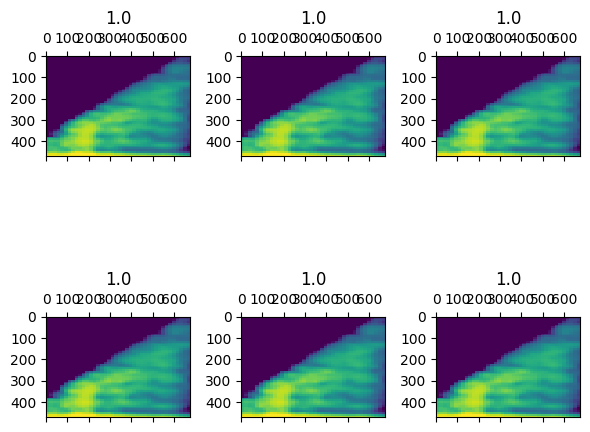

In [56]:
# Splits the data into train and test subsets 
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, test_size=0.33, random_state=42)

# Print shapes
print("Shape of X_train: ", X_train.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_test: ", y_test.shape)

# Scales the data
X_train = X_train.astype("float32") / 255
X_test = X_test.astype("float32") / 255

# Display images of the first 9 digits in the training set and their true lables
fig, axs = plt.subplots(2, 3, sharey=False, tight_layout=True, figsize=(6,6), facecolor='white')
n=0
for i in range(0,2):
    for j in range(0,3):
        axs[i,j].matshow(X_train[n])
        axs[i,j].set(title=y_train[n])
        n=n+1
plt.show() 

In [57]:
# Reshape input data from a matrix into an array like structure 
X_train = X_train.reshape(X_train.shape[0], size)
X_test = X_test.reshape(X_test.shape[0], size)

# Print shapes
print("New shape of X_train: ", X_train.shape)
print("New shape of X_test: ", X_test.shape)

New shape of X_train:  (6, 319072)
New shape of X_test:  (4, 319072)
